In [1]:
# Como fourier, pero en un tiempo corto o especifico,
# Toma la distribución de Gauss
# Se parece a lo que realiza nuestro ojo
# Función seno + Gauss, puedes ponerlo en diferentes direcciones

# Si hay direction, el filtro cuando coincide sirve
# Si no hay direction, el filtro se confunde.
# Si mezclas varias cosas sin direccionalidad fija, se confunde
# Floor-Curtain, lamp-Curtain -> No se confunde
# Curtain -Rope -> Se confunde

import cv2
import numpy as np

In [3]:
retval = cv2.getGaborKernel(ksize=(111,111), sigma=10, theta=60, lambd=10, gamma=1.2)
girl_anime = cv2.imread("unnamed.png")
result = cv2.filter2D(girl_anime, -1, retval)

In [3]:
cv2.imshow("Girl Anime Original", girl_anime)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [4]:
cv2.imshow("Result", result)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [4]:
# AHORA LO IMPLEMENTAMOS NOSOTROS
import matplotlib.pyplot as plt

girl_anime_gray = cv2.cvtColor(girl_anime, cv2.COLOR_BGR2GRAY)

def gabor_filter(ksize = 111, sigma=10, gamma=1.2, Lambda=10, psi=0, angle=0):
    d = ksize//2
    gabor = np.zeros((ksize, ksize), dtype=np.float32)
    for y in range(ksize):
        for x in range(ksize):
            px = x-d  # Distancia al centro
            py = y-d
            theta = angle / 180. * np.pi
            _x = np.cos(theta) * px + np.sin(theta) * py
            _y = -np.sin(theta) * px + np.cos(theta) * py
            gabor[y,x] = np.exp(-(_x**2 + gamma**2 * _y**2)/(2*sigma**2)) * np.cos(2*np.pi * _x / Lambda + psi)
    gabor/= np.sum(np.abs(gabor)) # Se normaliza
    return gabor

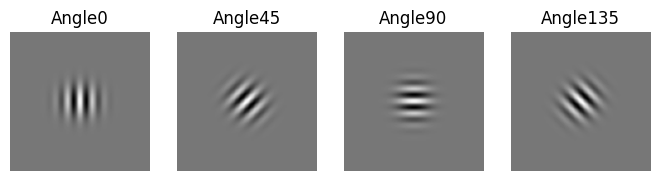

In [6]:
 As = [0, 45, 90, 135] # Angulos
plt.subplots_adjust(left=0, right=1, top=1, bottom=0, hspace=0, wspace=0.2)
for i, A in enumerate(As):
    gabor = gabor_filter(ksize=111, sigma=10, gamma=1.2, Lambda=10, psi=0, angle=A)
    # Normalizando en estas tres líneas para que los valores estén 0, 255
    out = gabor - np.min(gabor)
    out /= np.max(out)
    out *= 255
    out = out.astype(np.uint8)
    plt.subplot(1,4,i + 1)
    plt.imshow(out, cmap="gray")
    plt.axis("off")
    plt.title("Angle" + str(A))
plt.show()

In [5]:
def gabor_filtering(gray, ksize=111, sigma=10, gamma=1.2, Lambda=10, psi=0, angle=0):
    H, W = gray.shape
    gray = np.pad(gray, (ksize//2, ksize//2), "edge")
    out = np.zeros((H,W), dtype=np.float32)
    gabor = gabor_filter(ksize=ksize, sigma=sigma, gamma=gamma, Lambda=Lambda, psi=psi, angle=angle)
    for y in range(H):
        for x in range(W):
            out[y,x] = np.sum(gray[y:y+ksize, x:x+ksize] * gabor)
    out = np.clip(out, 0, 255)
    out = out.astype(np.uint8)
    return out


In [6]:
def gabor_process(image):
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY).astype(np.float32)
    H, W, _ = image.shape
    As = [0,30,60,90,120,150]
    plt.subplots_adjust(left=0,right=1, top=1, bottom=0, hspace=0, wspace=0.2)
    out = np.zeros((H,W), dtype=np.float32)
    for i, A in enumerate(As):
        _out = gabor_filtering(image_gray, ksize=11, sigma=1.5, gamma=1.2, Lambda=3, angle=A)
        out += _out
    out = out / out.max()*255 # Normalizar
    out = out.astype(np.uint8)
    return out


In [9]:
anime = cv2.imread("unnamed.png").astype(np.float32)
out = gabor_process(anime)
cv2.imshow("Girl Gabor", out)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

<Figure size 640x480 with 0 Axes>

In [9]:
rope = cv2.imread("test/Imagen de WhatsApp 2025-04-23 a las 20.33.48_aa6aa5bb.jpg").astype(np.float32)
out = gabor_process(rope)
cv2.imshow("Rope Gabor", out)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

<Figure size 640x480 with 0 Axes>

In [10]:
lamp = cv2.imread("test/Imagen de WhatsApp 2025-04-23 a las 20.33.50_8624a043.jpg").astype(np.float32)
out = gabor_process(lamp)
cv2.imshow("Lamp Gabor", out)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

<Figure size 640x480 with 0 Axes>

In [11]:
curtain = cv2.imread("test/Imagen de WhatsApp 2025-04-23 a las 19.50.50_7c3e1c6f.jpg").astype(np.float32)
out = gabor_process(curtain)
cv2.imshow("Rope Gabor", out)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

<Figure size 640x480 with 0 Axes>

In [12]:
floor = cv2.imread("test/Imagen de WhatsApp 2025-04-23 a las 19.50.55_5923eeab.jpg").astype(np.float32)
out = gabor_process(floor)
cv2.imshow("Rope Gabor", out)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

<Figure size 640x480 with 0 Axes>

In [7]:
# Comparar texturas mediante varianza y media
from scipy import ndimage as ndi

def compute_feats(image, kernels):
    feats = np.zeros((len(kernels),2), dtype=np.double)
    for k, kernel in enumerate(kernels):
        #filtered = image[:,:, None]
        filtered = ndi.convolve(image, kernel, mode="wrap") # Convolution Multidimensional
        #filtered = filtered.squeeze()
        feats[k,0] = filtered.mean()
        feats[k,1] = filtered.var()
    return feats

In [8]:
def match(feats, ref_feats):
    min_error = np.inf
    min_i = None
    for i in range(ref_feats.shape[0]):
        error = np.sum((feats-ref_feats[i,:])**2)
        if error < min_error:
            min_error = error
            min_i = i
    return min_i

In [ ]:
from skimage.filters import gabor_kernel
import glob

kernels = []
# Simular los rangos de la vision humana (4)
for theta in range(4):
    theta = theta/4.0 * np.pi
    for sigma in (1,3):
        for frequency in (0.05, 0.25):
            kernel = np.real(gabor_kernel(frequency, theta=theta, sigma_x=sigma, sigma_y=sigma))
            kernels.append(kernel)
            print(len(kernel))
            print("Shape", kernel.shape)

floor = cv2.imread("test/Imagen de WhatsApp 2025-04-23 a las 19.50.55_5923eeab.jpg")
curtain = cv2.imread("test/Imagen de WhatsApp 2025-04-23 a las 19.50.50_7c3e1c6f.jpg")
lamp = cv2.imread("test/Imagen de WhatsApp 2025-04-23 a las 20.33.50_8624a043.jpg")
rope = cv2.imread("test/Imagen de WhatsApp 2025-04-23 a las 20.33.48_aa6aa5bb.jpg")

print("Shape: ", floor.shape)
floor = cv2.cvtColor(floor, cv2.COLOR_BGR2GRAY)
rope = cv2.cvtColor(rope, cv2.COLOR_BGR2GRAY)
curtain = cv2.cvtColor(curtain, cv2.COLOR_BGR2GRAY)
lamp = cv2.cvtColor(lamp, cv2.COLOR_BGR2GRAY)
print("Shape: ", floor.shape)
ref_feats = np.zeros((4,len(kernels), 2), dtype=np.double)
ref_feats[0,:, :] = compute_feats(floor, kernels)
ref_feats[1,:, :] = compute_feats(rope, kernels)
ref_feats[2,:, :] = compute_feats(curtain, kernels)
ref_feats[3,:, :] = compute_feats(lamp, kernels)


image_names= ("floor", "rope", "curtain", "lamp")
for imagePath in glob.glob("training/*.jpg"):
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    feats = compute_feats(image, kernels)
    pred = image_names[match(feats, ref_feats)]
    print(type(pred))
    cv2.putText(image, pred, (20,30), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0,255,0), 3)
    cv2.imshow("Prediccion", image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


7
Shape (7, 7)
7
Shape (7, 7)
19
Shape (19, 19)
19
Shape (19, 19)
7
Shape (7, 7)
7
Shape (7, 7)
15
Shape (15, 15)
15
Shape (15, 15)
7
Shape (7, 7)
7
Shape (7, 7)
19
Shape (19, 19)
19
Shape (19, 19)
7
Shape (7, 7)
7
Shape (7, 7)
15
Shape (15, 15)
15
Shape (15, 15)
Shape:  (1600, 1200, 3)
Shape:  (1600, 1200)
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
